In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os
from src.Expert.Experiment import *
from src.Expert.Analyzer import *

import matplotlib as mpl
import seaborn as sns
# sns.set_style("whitegrid")
sns.set()

In [50]:
def printr(df):
    seq = []
    seq.append(("NoSolver", df[df['solver'] == 'No'].index.tolist()[0]))
    seq.append(("Diffusion", df[df['solver'] == 'Diff'].index.tolist()[0]))
    seq.append(("2Hub", df[df['solver'] == 'Oriented'].index.tolist()[0]))
    seq.append(("cA2C", df[df['solver'] == 'cA2C'][df['minimum_reward'] == 0.0].index.tolist()[0]))
    seq.append(("cA2Cm", df[df['solver'] == 'cA2C'][df['minimum_reward'] == 1.0].index.tolist()[0]))
    seq.append(("PPO", df[df['solver'] == 'Gym'].index.tolist()[0]))
    for name, i in seq:
        print("{} & ${:.0f} \pm {:.0f}$ & ${:.2f} \pm {:.2f}$ & ${:.2f}$ \\\\".format(name, 
                                                                       df.loc[i]['test_total_min_reward_per_epoch'], df.loc[i]['test_total_min_reward_per_epoch_std'],
                                                                       df.loc[i]['test_total_reward_per_epoch']/10**4, df.loc[i]['test_total_reward_per_epoch_std']/10**4,
                                                                       df.loc[i]['order_response_rates']
                                                                      ))
        
def plotr(df):
    seq = []
    seq.append(("NoPolicy", df[df['solver'] == 'No'].index.tolist()[0]))
    seq.append(("Diffusion", df[df['solver'] == 'Diff'].index.tolist()[0]))
    seq.append(("2Hub", df[df['solver'] == 'Oriented'].index.tolist()[0]))
    seq.append(("cA2C", df[df['solver'] == 'cA2C'][df['minimum_reward'] == 0.0].index.tolist()[0]))
    seq.append(("cA2Cm", df[df['solver'] == 'cA2C'][df['minimum_reward'] == 1.0].index.tolist()[0]))
    seq.append(("PPO", df[df['solver'] == 'Gym'].index.tolist()[0]))
    
    
#     for name, i in seq:
#         print("{} & ${:.0f} \pm {:.0f}$ & ${:.2f} \pm {:.2f}$ & ${:.2f}$ \\\\".format(name, 
#                                                                        df.loc[i]['test_total_min_reward_per_epoch'], df.loc[i]['test_total_min_reward_per_epoch_std'],
#                                                                        df.loc[i]['test_total_reward_per_epoch']/10**pow, df.loc[i]['test_total_reward_per_epoch_std']/10**pow,
#                                                                        df.loc[i]['order_response_rates_avg']
#                                                                       ))

    fig, ax = plt.subplots(1,2, figsize=(10, 6), dpi=150)
    sns.set(font_scale=2)
#     ax[0].ticklabel_format(style='sci', axis='x', scilimits=(-1000,1000))
#     ax[1].ticklabel_format(style='sci', axis='x', scilimits=(-1000,1000))
    ax[0].get_xaxis().get_major_formatter().set_scientific(True)
    ax[1].get_xaxis().get_major_formatter().set_scientific(True)

    people = [a[0] for a in seq]
    y_pos = np.arange(len(seq))
    performance = [df.loc[i]['test_total_reward_per_epoch']/10**4 for name, i in seq]
    error = [df.loc[i]['test_total_reward_per_epoch_std']/10**4 for name, i in seq]
    performance2 = [df.loc[i]['test_total_min_reward_per_epoch'] for name, i in seq]
    error2 = [df.loc[i]['test_total_min_reward_per_epoch_std'] for name, i in seq]

    ax[0].barh(y_pos, performance, xerr=error, align='center')
    ax[0].invert_xaxis()
    ax[0].set_yticks(y_pos)
    ax[0].set_yticklabels(people)
    ax[0].invert_yaxis()  # labels read top-to-bottom
    ax[0].set_xlabel('Total Income $[ \cdot10^4 ]$')

    ax[1].barh(y_pos, performance2, xerr=error2, align='center')
    ax[1].set_yticks(y_pos)
    # ax[1].set_yticklabels(people)
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        labelleft=False) # labels along the bottom edge are off
    ax[1].invert_yaxis()  # labels read top-to-bottom
    ax[1].set_xlabel('Minimal Income')

    plt.show()

In [48]:
df = Analyzer("medium_grid").df
df['order_response_rates'] = df['order_response_rates'].apply(lambda x: np.mean(x))

In [30]:
printr(df)

NoSolver & $0 \pm 0$ & $1.76 \pm 0.01$ & $0.85$ \\
Diffusion & $6 \pm 2$ & $1.85 \pm 0.01$ & $0.90$ \\
2Hub & $0 \pm 0$ & $1.46 \pm 0.02$ & $0.75$ \\
cA2C & $1 \pm 1$ & $1.73 \pm 0.03$ & $0.88$ \\
cA2Cm & $0 \pm 0$ & $1.67 \pm 0.02$ & $0.83$ \\
PPO & $8 \pm 2$ & $1.81 \pm 0.01$ & $0.88$ \\


/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


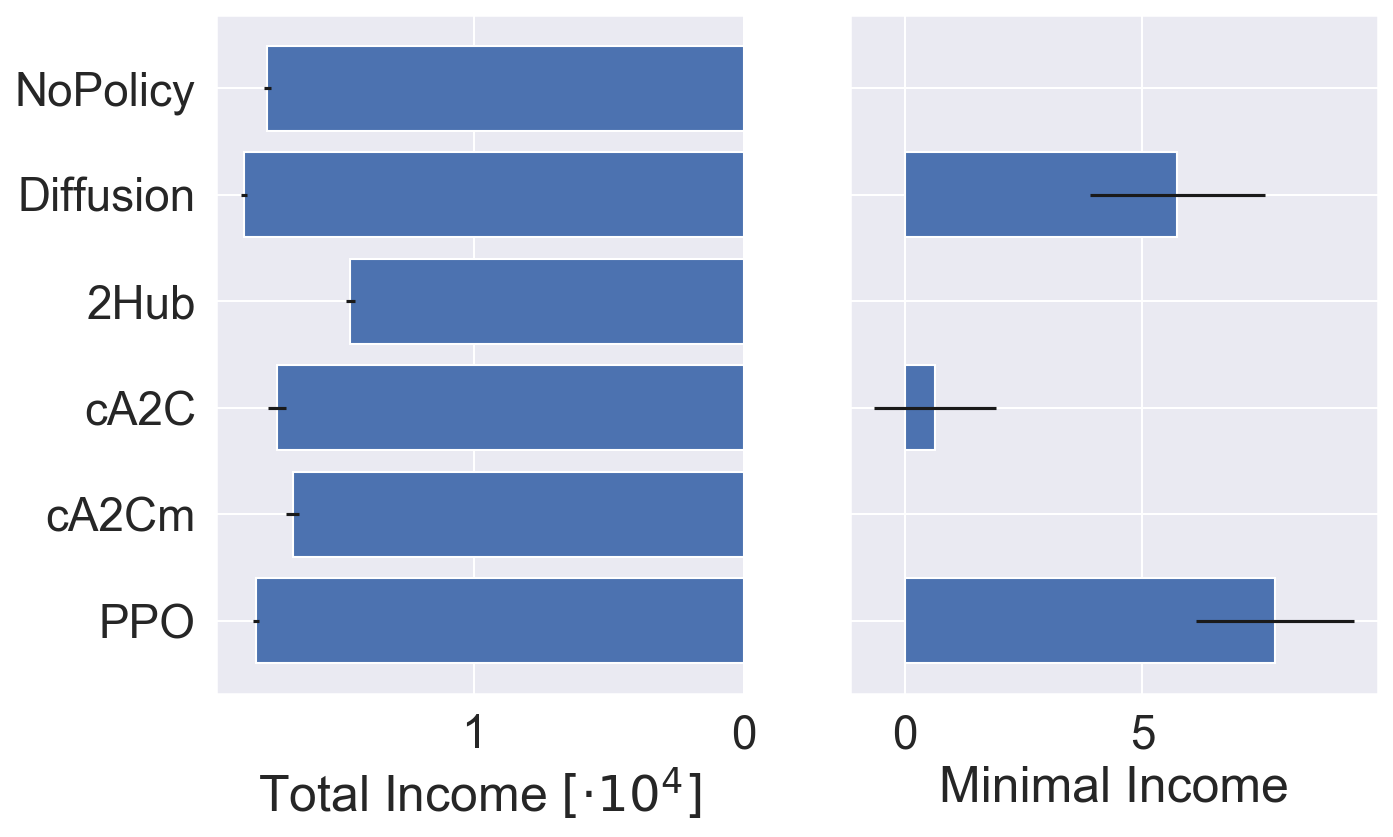

In [51]:
plotr(df)

In [10]:
df[['solver', 'weight_poorest', 'minimum_reward', 'include_income_to_observation', 'normalize_rewards', 'test_total_reward_per_epoch', 'test_total_reward_per_epoch_std', 
    'test_total_min_reward_per_epoch', 'test_total_min_reward_per_epoch_std','order_response_rates']]

,solver,weight_poorest,minimum_reward,include_income_to_observation,normalize_rewards,test_total_reward_per_epoch,test_total_reward_per_epoch_std,test_total_min_reward_per_epoch,test_total_min_reward_per_epoch_std,order_response_rates
0,cA2C,0.0,1.0,1.0,0.0,16703.556840,238.146758,0.000000,0.000000,0.834801
1,Gym,0.0,1.0,1.0,0.0,18056.519052,122.043356,7.794176,1.657721,0.884843
2,No,NaN,NaN,NaN,NaN,17631.960997,136.126192,0.000000,0.000000,0.853095
3,Diff,NaN,NaN,NaN,NaN,18510.375130,107.711860,5.737259,1.847584,0.901381
4,Oriented,NaN,NaN,NaN,NaN,14562.404752,175.274474,0.000000,0.000000,0.753916


In [31]:
df = Analyzer("medium_grid_dense").df
df['order_response_rates'] = df['order_response_rates'].apply(lambda x: np.mean(x))
df.columns

Index(['_id', 'batch_size', 'count_neighbors', 'dataset_id', 'dataset_path',
       'dataset_type', 'days', 'dummy_data_param', 'episode_conflicts_drivers',
       'episode_dispatched_drivers', 'episode_rewards', 'epsilon', 'footprint',
       'gamma', 'include_income_to_observation', 'income_distr', 'init_time',
       'iterations', 'learning_rate', 'minimum_reward', 'mode', 'n',
       'nodes_with_drivers', 'normalize_rewards', 'number_of_cars',
       'order_distr', 'order_response_rate_episode', 'order_response_rates',
       'order_sampling_multiplier', 'orders_density', 'poorest_first',
       'record_all_order_response_rate', 'seeds', 'solver', 'tag',
       'test_min_income', 'test_rewards', 'test_test_time',
       'test_total_min_reward_per_epoch',
       'test_total_min_reward_per_epoch_std', 'test_total_reward_per_epoch',
       'test_total_reward_per_epoch_std', 'testing_epochs', 'time_periods',
       'time_periods_per_hour', 'train_time', 'trained_model_id', 'wc',
      

In [32]:
df[['solver', 'weight_poorest', 'minimum_reward', 'include_income_to_observation', 'normalize_rewards', 'test_total_reward_per_epoch', 'test_total_reward_per_epoch_std', 
    'test_total_min_reward_per_epoch', 'test_total_min_reward_per_epoch_std','order_response_rates']]

,solver,weight_poorest,minimum_reward,include_income_to_observation,normalize_rewards,test_total_reward_per_epoch,test_total_reward_per_epoch_std,test_total_min_reward_per_epoch,test_total_min_reward_per_epoch_std,order_response_rates
0,cA2C,0.0,1.0,0.0,0.0,64292.762304,58.572483,37.567159,0.838375,0.863269
1,cA2C,0.0,1.0,1.0,0.0,61036.709516,439.724863,31.286586,1.775487,0.834557
2,Gym,0.0,1.0,0.0,0.0,66143.830381,270.014382,47.201443,0.624834,0.883190
3,Gym,0.0,1.0,1.0,0.0,66164.940212,406.713073,48.739210,0.514217,0.881417
4,RobustGym,0.0,0.0,1.0,0.0,66358.867436,413.895992,47.237993,1.039273,0.895408
5,No,NaN,NaN,NaN,NaN,58814.454449,453.320279,-0.200000,0.000000,0.811746
6,Diff,NaN,NaN,NaN,NaN,66363.123064,77.470463,17.073196,1.375896,0.885709
7,RobustGym,0.0,0.0,0.0,0.0,66900.822811,514.850478,49.216005,0.198970,0.888208
8,cA2C,0.0,1.0,0.0,1.0,60912.783281,649.088592,26.895699,0.667553,0.821138
9,Gym,0.0,1.0,1.0,1.0,65515.296838,333.340457,42.903144,2.176866,0.880302


In [52]:
df = Analyzer("medium_airport").df
df['order_response_rates'] = df['order_response_rates'].apply(lambda x: np.mean(x))
df[['solver', 'weight_poorest', 'minimum_reward', 'include_income_to_observation', 'normalize_rewards', 'test_total_reward_per_epoch', 'test_total_reward_per_epoch_std', 
    'test_total_min_reward_per_epoch', 'test_total_min_reward_per_epoch_std','order_response_rates']]

,solver,weight_poorest,minimum_reward,include_income_to_observation,normalize_rewards,test_total_reward_per_epoch,test_total_reward_per_epoch_std,test_total_min_reward_per_epoch,test_total_min_reward_per_epoch_std,order_response_rates
0,cA2C,0.0,0.0,0.0,1.0,15795.546534,336.441577,0.000000,0.000000,0.087388
1,Gym,0.0,1.0,1.0,0.0,7262.817338,792.874294,0.000000,0.000000,0.090243
2,No,NaN,NaN,NaN,NaN,3342.965950,238.134249,0.000000,0.000000,0.023017
3,Diff,NaN,NaN,NaN,NaN,12007.867150,853.997215,0.000000,0.000000,0.084217
4,Oriented,NaN,NaN,NaN,NaN,71151.569708,652.729418,10.977498,1.676093,0.268543
5,cA2C,0.0,1.0,1.0,0.0,15066.515103,385.535504,0.000000,0.000000,0.064150


In [53]:
printr(df)

NoSolver & $0 \pm 0$ & $0.33 \pm 0.02$ & $0.02$ \\
Diffusion & $0 \pm 0$ & $1.20 \pm 0.09$ & $0.08$ \\
2Hub & $11 \pm 2$ & $7.12 \pm 0.07$ & $0.27$ \\
cA2C & $0 \pm 0$ & $1.58 \pm 0.03$ & $0.09$ \\
cA2Cm & $0 \pm 0$ & $1.51 \pm 0.04$ & $0.06$ \\
PPO & $0 \pm 0$ & $0.73 \pm 0.08$ & $0.09$ \\


/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/Cellar/jupyter/1.0.0_5/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


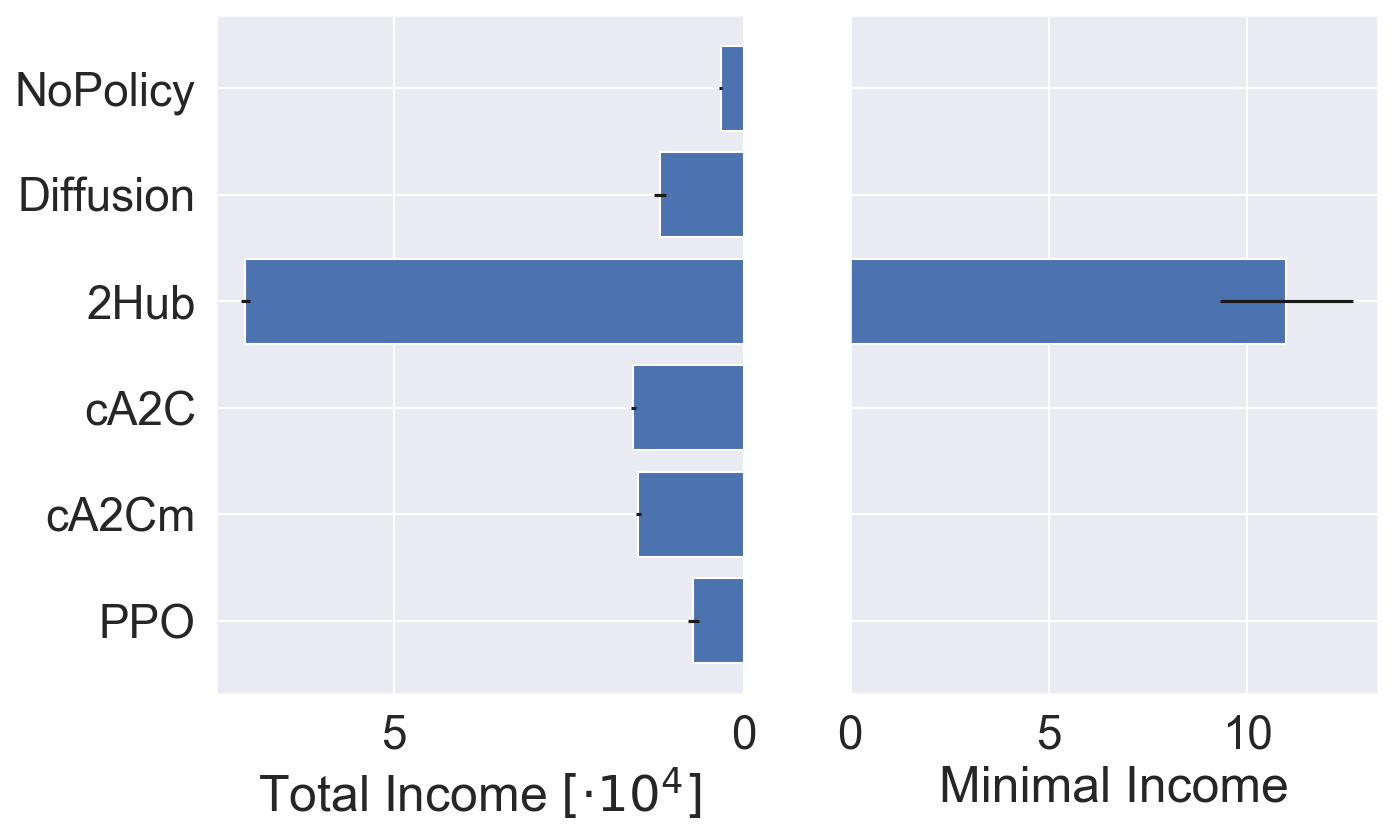

In [54]:
plotr(df)

In [73]:
df = Analyzer("medium_grid_zero").df
df.columns
df['order_response_rates_avg'] = df['order_response_rates'].apply(lambda x: np.mean(x))
df['order_response_rates_std'] = df['order_response_rates'].apply(lambda x: np.std(x))

In [74]:
df[['solver', 'weight_poorest', 'minimum_reward', 'include_income_to_observation', 'normalize_rewards', 'test_total_reward_per_epoch', 'test_total_reward_per_epoch_std', 
    'test_total_min_reward_per_epoch', 'test_total_min_reward_per_epoch_std','order_response_rates_avg','order_response_rates_std','test_test_time']]

,solver,weight_poorest,minimum_reward,include_income_to_observation,normalize_rewards,test_total_reward_per_epoch,test_total_reward_per_epoch_std,test_total_min_reward_per_epoch,test_total_min_reward_per_epoch_std,order_response_rates_avg,order_response_rates_std,test_test_time
0,No,NaN,NaN,NaN,NaN,55724.994560,428.893971,0.000000,0.000000,0.820201,0.0,159.261566
1,Diff,NaN,NaN,NaN,NaN,62790.600335,415.693889,16.335148,6.330148,0.894812,0.0,160.402700
2,cA2C,0.0,1.0,0.0,0.0,59654.945396,302.078683,26.711079,4.213497,0.855126,0.0,162.406196
3,cA2C,0.0,0.0,0.0,0.0,61615.410164,808.086851,40.006088,4.573149,0.877555,0.0,160.203199
4,cA2C,0.0,0.0,0.0,1.0,63321.738811,1297.280403,41.848710,6.161387,0.894059,0.0,160.314550
5,Gym,1.0,0.0,1.0,0.0,61866.568906,508.745406,36.765464,3.859824,0.880781,0.0,189.580955
6,Gym,0.0,1.0,1.0,0.0,62429.778165,409.337798,43.264979,3.424595,0.891011,0.0,191.282436
7,Gym,0.0,1.0,1.0,0.0,60779.357277,701.881445,23.462789,5.735935,0.890360,0.0,184.419119
8,cA2C,0.0,1.0,1.0,0.0,55490.181590,569.974425,8.995045,0.905282,0.823091,0.0,182.087360


In [75]:
s = df.loc[6]['iterations_stats']

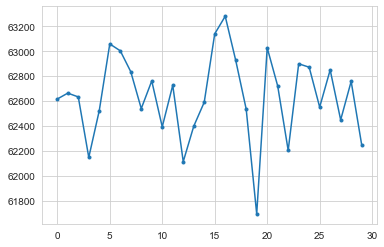

In [76]:
total_r = [s[str(i)]['rewards'] for i in range(len(s))]
plt.plot(total_r,'.-')

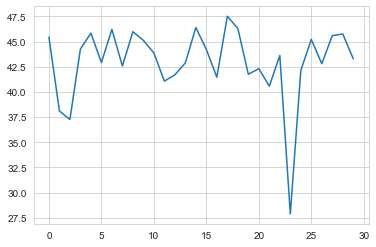

In [77]:
min_r = [s[str(i)]['min_income'] for i in range(len(s))]
plt.plot(min_r)

# Clean

In [1]:
df = Analyzer("medium_grid_dense_clean").df
df.columns

NameError: name 'Analyzer' is not defined

In [10]:
df['order_response_rates_avg'] = df['order_response_rates'].apply(lambda x: np.mean(x))
df['order_response_rates_std'] = df['order_response_rates'].apply(lambda x: np.std(x))

In [11]:
df[['solver', 'weight_poorest', 'minimum_reward', 'include_income_to_observation', 'normalize_rewards', 'test_total_reward_per_epoch', 'test_total_reward_per_epoch_std', 
    'test_total_min_reward_per_epoch', 'test_total_min_reward_per_epoch_std','order_response_rates_avg','order_response_rates_std','test_test_time']]

,solver,weight_poorest,minimum_reward,include_income_to_observation,normalize_rewards,test_total_reward_per_epoch,test_total_reward_per_epoch_std,test_total_min_reward_per_epoch,test_total_min_reward_per_epoch_std,order_response_rates_avg,order_response_rates_std,test_test_time
0,No,NaN,NaN,NaN,NaN,67468.420163,374.523519,-5.422199,1.612708,0.849678,0.0,176.320739
1,Diff,NaN,NaN,NaN,NaN,70541.514947,283.335346,19.584901,6.170260,0.886285,0.0,176.083100
2,Gym,0.0,1.0,1.0,0.0,69334.328372,479.987174,43.054618,2.398058,0.869245,0.0,201.194769
3,cA2C,0.0,0.0,0.0,1.0,69995.570754,291.990798,49.702353,3.921514,0.881078,0.0,187.939715
4,cA2C,1.0,0.0,0.0,1.0,66509.631207,549.087625,24.872552,2.043922,0.832944,0.0,181.237348
5,Gym,0.0,1.0,1.0,0.0,69702.433337,344.778765,46.045263,2.905240,0.876205,0.0,197.817067
6,cA2C,0.0,1.0,0.0,0.0,68983.992381,501.222136,32.081508,4.546183,0.855016,0.0,191.043708


In [58]:
s = df.loc[4]['iterations_stats']

In [59]:
s

{}

In [45]:
[k for k in s['0']]

['seed',
 'income_distr',
 'order_response_rates',
 'nodes_with_drivers',
 'nodes_with_orders',
 'min_income',
 'rewards',
 'testing_iteration_time']

In [46]:
total_r = [np.sum(s[str(i)]['rewards']) for i in range(len(s))]

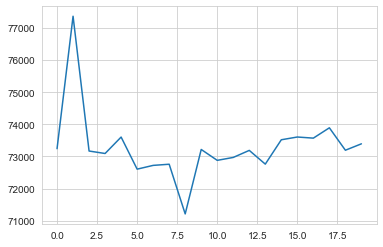

In [47]:
plt.plot(total_r)

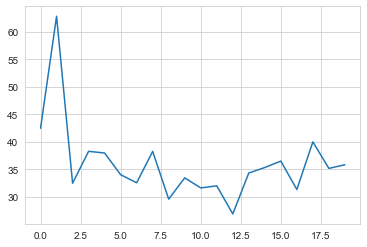

In [48]:
min_r = [s[str(i)]['min_income'][-1] for i in range(len(s))]
plt.plot(min_r)